In [1]:
import pandas as pd
import pandas_profiling

import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(style="whitegrid")

%matplotlib inline

In [39]:
df_2020 = pd.read_csv('./full_2020.csv', dtype={}, low_memory=False)

In [26]:
df_2017 = pd.read_csv('./full_2017.csv', dtype={}, low_memory=False)

In [42]:
filtered_data = df_2020[(df_2020["code_departement"] == '6')]

In [43]:
filtered_data

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude


In [4]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323540,46.171919
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893436,46.251868
2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.899919,46.235327
3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882347,46.246519
4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894688,46.251820


In [5]:
df.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                     float64


In [6]:
# Add new column and compute price per m2 
df['price_per_m2'] = df['valeur_fonciere']/df['surface_reelle_bati']

# Exploratory Data Analysis with pandas_profiling

In [7]:
#df.profile_report()

# What are the departements with the highest number of real estate transactions

In [8]:
df.code_departement.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '49', '45', '46', '47', '48', '50', '51', '52', '53', '54',
       '55', '56', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '69', '70', '71', '72', '73', '74', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '92', '93', '94', '95', '971', '972', '973', '974', '75'],
      dtype=object)

In [9]:
df['code_departement'].value_counts()

33     91383
59     84457
44     81754
77     66274
35     63357
       ...  
972     2909
55      2892
12      1888
971     1254
2B       460
Name: code_departement, Length: 97, dtype: int64

In [10]:
def get_highest_dept_transactions(df, top = 10):
    """
    get the departements with the highest number of real estate
    input : df : dataframe
    return : list of "highest" departements
    """
    
    # Groupby to find total number of transactiosn 
    mutation_by_dept = df.groupby(['code_departement']).count()['id_mutation']

    # Then sort descending 
    mutation_by_dept = mutation_by_dept.sort_values(ascending=False).copy()

    return mutation_by_dept.iloc[:top]

In [24]:
# get department with the highest number of mutations
top = 20
highest_dept_by_mutation =  get_highest_dept_transactions(df, top) 

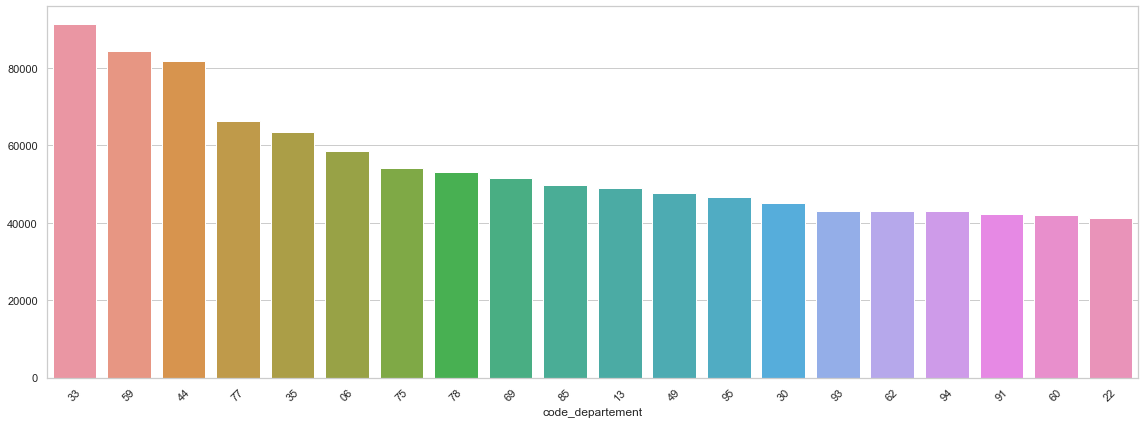

In [25]:
plt.figure(figsize=(16,6))
sns.barplot(x=highest_dept_by_mutation.index, y=highest_dept_by_mutation.values)
plt.xticks(rotation=45)
plt.tight_layout()

Le département de la Gironde (33) est celui qui le plus de transactions immobilières en France. Regardons les communes dont le $m^2$ est le plus élevé et le moins élevé

# Given a department, what are the communes with the highest and the lowest price per square meter ?

In [13]:
def get_most_expensive_com_in_dept(df, dept='1', top = 10):
    """
    Given a dept number, get the highest communes with the highest and lowest prices per m2
    input : df : dataframe, dept number, highest
    return : list of "highest" communes, list of the lowest communes
    """
    
    # Select mutations for dept
    df_com = df[(df['code_departement']==dept) & (df['nature_mutation']=='Vente')].copy(deep=True)

    # Some price are missing, we drop them 
    df_com = df_com.dropna(subset=['price_per_m2'])

    # find the highest 
    most_expensive_communes = df_com.groupby(['code_commune']).mean()['price_per_m2']
    most_expensive_communes = most_expensive_communes.sort_values(ascending=False)
    most_expensive_communes = most_expensive_communes[:top]
    
    # find the highest 
    less_expensive_communes = df_com.groupby(['code_commune']).mean()['price_per_m2']
    less_expensive_communes = less_expensive_communes.sort_values()
    less_expensive_communes = less_expensive_communes[:top]

    return most_expensive_communes, less_expensive_communes

In [14]:
# get top 10 communes for dept 33

top = 10
dept = '33'

# get the most expensive and less expensive communes regarding price per m2
most_expensive_communes, less_expensive_communes = get_most_expensive_com_in_dept(df, dept)

print("\nThe top {} communes with the highest price per m2 in dept {} are : \n{}".format(top, dept, most_expensive_communes.head(top)))
print("\nThe top {} communes with the lowest price per m2 in dept {} are : \n{}".format(top, dept, less_expensive_communes.head(top)))



The top 10 communes with the highest price per m2 in dept 33 are : 
code_commune
33396    228163.076205
33192     43732.937082
33302     38284.343027
33550     36111.046942
33421     32216.284230
33522     15997.411412
33167     15526.065217
33279     15320.551563
33243     13881.928398
33499     12584.508131
Name: price_per_m2, dtype: float64

The top 10 communes with the lowest price per m2 in dept 33 are : 
code_commune
33148      2.576000
33074    666.666667
33094    755.099412
33246    772.727273
33378    792.038836
33223    808.652181
33228    886.845537
33247    890.270224
33166    929.280507
33380    961.517975
Name: price_per_m2, dtype: float64


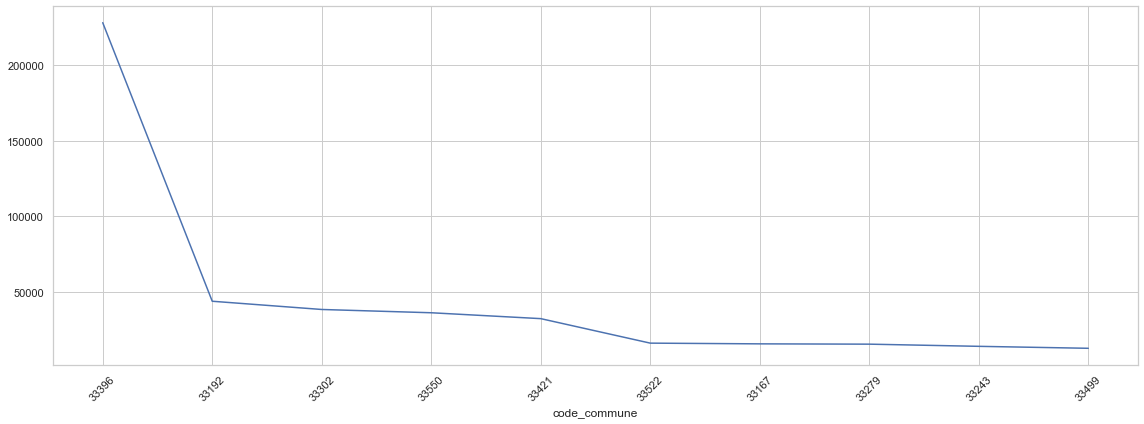

In [15]:
plt.figure(figsize=(16,6))
sns.lineplot(x=most_expensive_communes.index, y=most_expensive_communes.values)
plt.xticks(rotation=45)
plt.tight_layout()

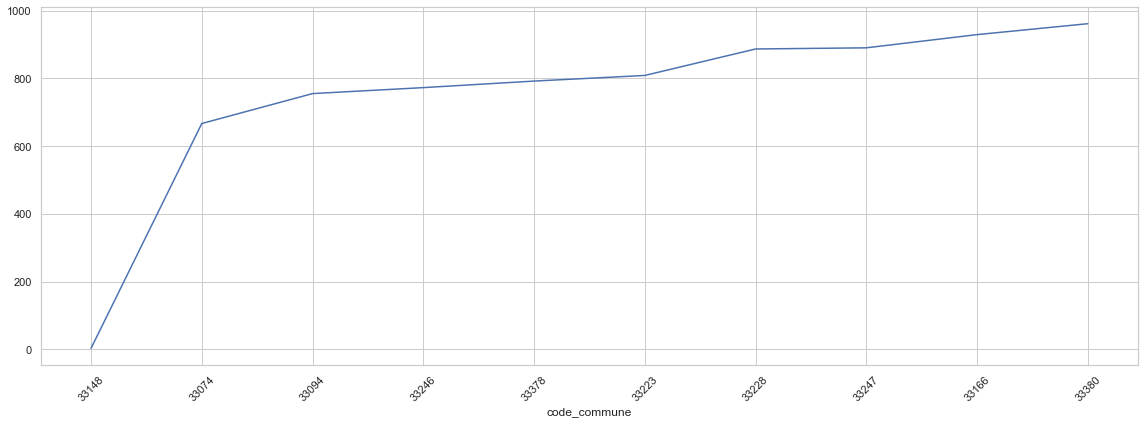

In [16]:
plt.figure(figsize=(16,6))
sns.lineplot(x=less_expensive_communes.index, y=less_expensive_communes.values)
plt.xticks(rotation=45)
plt.tight_layout()

Regardons la répartition des transactions immobilières part types de biens (maison, appartement...)

# Given a department, what is the repartition of mutations by category

In [17]:
def get_mutation_repartition_by_types_in_dept(df, dept='1', top=5):
    """
    Given a dept number, get the  prices per m2
    input : df : dataframe, dept number, highest
    return : list of "highest" communes, list of the lowest communes
    """
    
    # Select mutations for dept
    df_types = df[df['code_departement']==dept].copy(deep=True)
    
    # group by 'type_local'
    df_types = df_types.groupby(['type_local']).count()['id_mutation']
    
    # sort ascending
    df_types = df_types.sort_values(ascending=False)
    
    return df_types

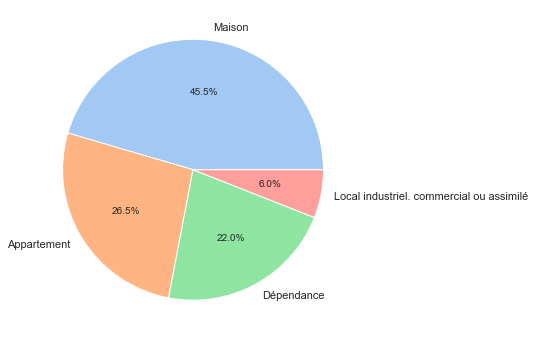

In [18]:
top = 5
dept='33'

df_types = get_mutation_repartition_by_types_in_dept(df, dept, top)
data = df_types.values
labels = df_types.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:top]

#create pie chart
plt.figure(figsize=(16,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

On va regarder la tendance des prix pour les 5 communes les plus chères

# get price trend for communes withe highest price per m2 

In [19]:
def get_price_trends(df, dept='33'):
    
    # select only communes for dept
    df_trend = df[df['code_departement']==dept].copy(deep=True)
    
    # Convert date_mutation to datetime type 
    df_trend['date_mutation'] = pd.to_datetime(df_trend['date_mutation'])

    # create multindex
    df_trend = df_trend.set_index([pd.to_datetime(df_trend['date_mutation']), 'code_commune' ], drop=True)
    
    # drop unused colum
    df_trend = df_trend.drop(['date_mutation'], axis=1)
    
    # group by multindex
    df_trend = df_trend.groupby(['date_mutation', 'code_commune']).mean()

    # unstack the data
    data_flat = df_trend.unstack().resample('M').mean()['price_per_m2']
    data_flat = data_flat.stack().reset_index() #
    data_flat.columns=['date_mutation','code_commune','price_per_m2']
    
    return data_flat

<Figure size 1152x1152 with 0 Axes>

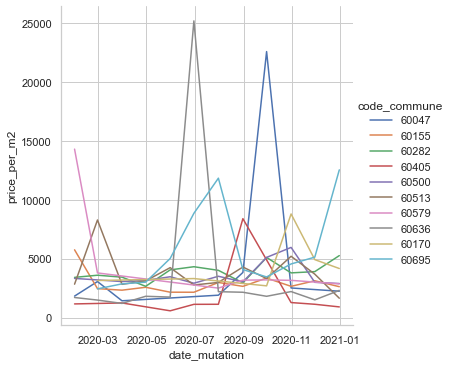

In [20]:
# get top 10 communes for dept 33

top = 10
dept = '60'

# get the most expensive and less expensive communes regarding price per m2
most_expensive_communes, less_expensive_communes = get_most_expensive_com_in_dept(df, dept)

# get price trend for this dept
data_flat = get_price_trends(df, dept)
data_flat = data_flat[data_flat['code_commune'].isin(most_expensive_communes.index.to_list())]

#create pie chart
plt.figure(figsize=(16,16))
sns.relplot(data=data_flat, x='date_mutation', y='price_per_m2', hue='code_commune', kind="line")
plt.show()

In [21]:
whos

Variable                                    Type         Data/Info
------------------------------------------------------------------
colors                                      list         n=5
data                                        ndarray      4: 4 elems, type `int64`, 32 bytes
data_flat                                   DataFrame         date_mutation code_c<...>n\n[101 rows x 3 columns]
dept                                        str          60
df                                          DataFrame              id_mutation dat<...>459560 rows x 41 columns]
df_types                                    Series       type_local\nMaison       <...>id_mutation, dtype: int64
get_highest_dept_transactions               function     <function get_highest_dep<...>ctions at 0x7fc2ce604b80>
get_most_expensive_com_in_dept              function     <function get_most_expens<...>n_dept at 0x7fc1e351b550>
get_mutation_repartition_by_types_in_dept   function     <function get_mutation_re<...>n